<a href="https://colab.research.google.com/github/kscharann/Final-year-project/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from keras.callbacks import ModelCheckpoint
from keras.layers import Dropout
from numpy import mean
from numpy import std
from numpy import round
import numpy as np
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical  # changed
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD  # changed
import pandas as pd
from keras import backend as K
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D

import matplotlib.pyplot as plt


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(125973, 42)
[0 0 1 ... 0 1 0]
(125973,)
(1, 1, 7, 6)
Epoch 1/10
2638/2638 - 14s - loss: 511.8335 - accuracy: 0.8534 - val_loss: 82.4591 - val_accuracy: 0.9144 - 14s/epoch - 5ms/step
Epoch 2/10
2638/2638 - 9s - loss: 115.8235 - accuracy: 0.9092 - val_loss: 201.0477 - val_accuracy: 0.9425 - 9s/epoch - 4ms/step
Epoch 3/10
2638/2638 - 10s - loss: 225.6821 - accuracy: 0.9230 - val_loss: 140.1167 - val_accuracy: 0.9401 - 10s/epoch - 4ms/step
Epoch 4/10
2638/2638 - 10s - loss: 129.0511 - accuracy: 0.9350 - val_loss: 31.2011 - val_accuracy: 0.9436 - 10s/epoch - 4ms/step
Epoch 5/10
2638/2638 - 12s - loss: 24.4903 - accuracy: 0.9370 - val_loss: 1.8534 - val_accuracy: 0.9617 - 12s/epoch - 5ms/step
Epoch 6/10
2638/2638 - 9s - loss: 3.5254 - accuracy: 0.9435 - val_loss: 0.1039 - val_accuracy: 0.9635 - 9s/epoch - 3ms/step
Epoch 7/10
2638/2638 - 22s - loss: 0.1508 - accuracy: 0.9507 - val_loss: 0.1039 - val_accuracy: 0.9654 - 22s/epoch - 8ms/step
Epoch 8/10
2638/2638 - 10s - loss: 0.1821 - accuracy:

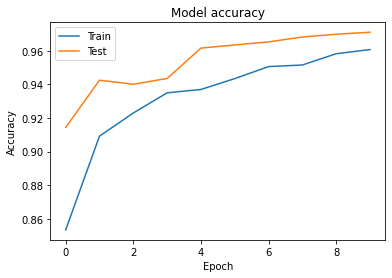

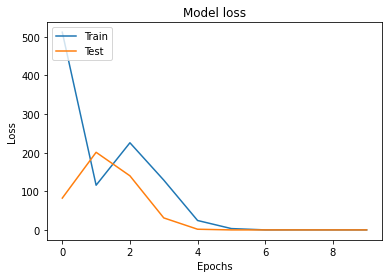

Epoch 1/10
2638/2638 - 13s - loss: 1014.7939 - accuracy: 0.8287 - val_loss: 9.1800 - val_accuracy: 0.8547 - 13s/epoch - 5ms/step
Epoch 2/10
2638/2638 - 12s - loss: 1180.5107 - accuracy: 0.8889 - val_loss: 156.8045 - val_accuracy: 0.8939 - 12s/epoch - 4ms/step
Epoch 3/10
2638/2638 - 12s - loss: 68.6924 - accuracy: 0.8937 - val_loss: 0.7725 - val_accuracy: 0.9218 - 12s/epoch - 4ms/step
Epoch 4/10
2638/2638 - 11s - loss: 1.2000 - accuracy: 0.9050 - val_loss: 0.2209 - val_accuracy: 0.9383 - 11s/epoch - 4ms/step
Epoch 5/10
2638/2638 - 13s - loss: 0.3083 - accuracy: 0.9135 - val_loss: 0.2232 - val_accuracy: 0.9505 - 13s/epoch - 5ms/step
Epoch 6/10
2638/2638 - 14s - loss: 0.4172 - accuracy: 0.9167 - val_loss: 0.1531 - val_accuracy: 0.9397 - 14s/epoch - 5ms/step
Epoch 7/10
2638/2638 - 14s - loss: 8.8157 - accuracy: 0.9283 - val_loss: 0.1602 - val_accuracy: 0.9416 - 14s/epoch - 5ms/step
Epoch 8/10
2638/2638 - 14s - loss: 0.1394 - accuracy: 0.9452 - val_loss: 0.0923 - val_accuracy: 0.9641 - 14s/

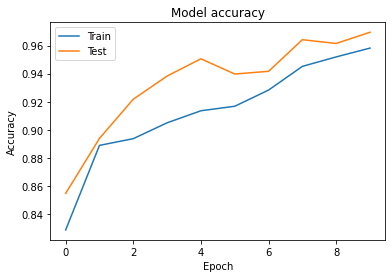

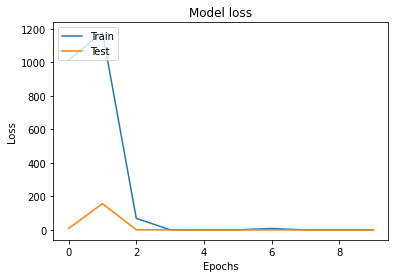

> 53.290
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 1, 7, 32)          224       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 1, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 224)               0         
                                                                 
 dense_13 (Dense)            (None, 100)               22500     
                                                                 
 dense_14 (Dense)            (None, 1)                 101       
                                                                 
Total params: 22,825
Trainable params: 22,825
Non-trainable params: 0
_________________________________________

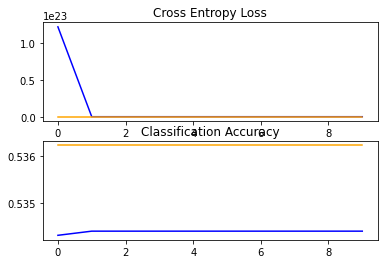

Accuracy: mean=53.290 std=0.000, n=1


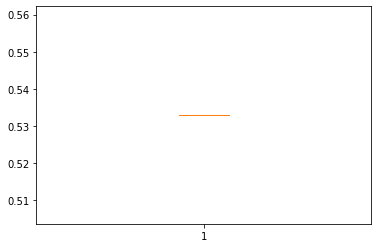

705/705 [==============================] - 1s 2ms/step
Predicted Class by Model 1:  [0.9999963]
Predicted Class by Model 1 (rounded):  [1.]
Actual Class in the Dataset :  1.0
705/705 [==============================] - 1s 2ms/step
Predicted Class by Model 1:  [0.99999404]
Predicted Class by Model 1 (rounded):  [1.]
Actual Class in the Dataset :  1.0


In [6]:
train = pd.read_csv("./traindata.csv").values
test = pd.read_csv("./testdata.csv").values

print(train[:, 1:].shape)
trainX = train[:, 1:].reshape((train.shape[0], 1, 7, 6))
y_train = train[:, 0]
print(y_train)
print(y_train.shape)

testX = test[:, 1:].reshape(test.shape[0], 1, 7, 6)
y_test = test[:, 0]
print(testX[:1, :].shape)


# MODEL 1
model = Sequential()
K.image_data_format()  # changed
model.add(Convolution2D(15, 1, 1, padding='valid',
          input_shape=(1, 7, 6), activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Convolution2D(15, 1, 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

# MODEL 2
model1 = Sequential()
K.image_data_format()  # changed
model1.add(Convolution2D(15, 1, 1, padding='valid',  # changed
           input_shape=(1, 7, 6), activation='relu'))
model1.add(MaxPooling2D(pool_size=(1, 1)))
model1.add(Convolution2D(15, 1, 1, activation='relu'))
model1.add(MaxPooling2D(pool_size=(1, 1)))
model1.add(Dropout(0.2))
model1.add(Flatten())
model1.add(Dense(15, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
#model.add(Dense(10, activation= 'softmax' ))
# Compile model
#model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
model1.compile(optimizer='adam', loss='binary_crossentropy',
               metrics=['accuracy'])


filepath = "best_model.hdf5"
checkpoint = ModelCheckpoint(
    filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

X = np.asarray(trainX).astype('float32')
Y = np.asarray(y_train).astype('float32')
history = model1.fit(X, Y, validation_split=0.33, epochs=10, verbose=2)
print("\\nTraining Performance Metrics")
print(history.history.keys())
loss1, acc1 = model1.evaluate(testX, y_test, verbose=2)
print("\\nTesting Performance Metrics")
print("Loss: ", loss1)
print("Accuracy: ", acc1)
print("MODEL Summary ", model1.summary())

# MODEL 2 - Plot
print("MODEL 2 - Performance Metrics")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# MODEL 1 - RUNNING....
history1 = model.fit(X, Y, validation_split=0.33, epochs=10, verbose=2)
print(history1.history.keys())
loss2, acc2 = model.evaluate(testX, y_test, verbose=2)
print("\\nTesting Accuracy and Loss")
print("Loss: ", loss2)
print("Acc: ", acc2)
print("\\nMODEL 1 SUMMARY")
model.summary()

# MODEL 1 - Plot
print("MODEL 1 - Performance Metrics")
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# MODEL 3


def define_model():
    model2 = Sequential()
    model2.add(Conv2D(32, (1, 1), activation='relu', kernel_initializer='he_uniform', input_shape=(1, 7, 6)))
    model2.add(MaxPooling2D((1, 1)))
    model2.add(Flatten())
    model2.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model2.add(Dense(1, activation='sigmoid'))
# compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model2.compile(optimizer=opt, loss='binary_crossentropy',
                   metrics=['accuracy'])
    return model2


def evaluate_model(dataX, dataY, n_folds=5):
    scores, histories = list(), list()
# prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
# enumerate splits
    for train_ix, test_ix in kfold.split(dataX):
        # define model
        model = define_model()
    # print(\"Hi\",model.summary())
    # select rows for train and test
    trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
    # fit model
    X = np.asarray(trainX).astype('float32')
    Y = np.asarray(trainY).astype('float32')
    XTest = np.asarray(testX).astype('float32')
    YTest = np.asarray(testY).astype('float32')
    history = model.fit(X, Y, validation_split=0.33,
                        epochs=10, batch_size=32, verbose=0)
    # evaluate model\n",
    _, acc = model.evaluate(XTest, YTest, verbose=0)
    print('> %.3f' % (acc * 100.0))
    # append scores
    scores.append(acc)
    histories.append(history)
    print("Model Summary", model.summary())
    print("\nPrection by - Model 3")
    yhat = model.predict(testX)
    print(yhat[0])
    print(testY[0])
    return scores, histories


def summarize_diagnostics(histories):
    for i in range(len(histories)):
       # plot loss
        pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(histories[i].history['loss'], color='blue', label='train')
    pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
    pyplot.plot(histories[i].history['val_accuracy'],
                color='orange', label='test')
    pyplot.show()


def summarize_performance(scores):
    # print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' %
          (mean(scores)*100, std(scores)*100, len(scores)))
    # box and whisker plots of results
    pyplot.boxplot(scores)
    pyplot.show()


def run_test_harness():
    # evaluate model4
    scores, histories = evaluate_model(X, Y)
    # learning curves
    summarize_diagnostics(histories)
    # summarize estimated performance
    summarize_performance(scores)


run_test_harness()

# Prediction By - MODEL 1
yhat = model.predict(testX)
print("Predicted Class by Model 1: ", yhat[0])
print("Predicted Class by Model 1 (rounded): ", round(yhat[0]))
print("Actual Class in the Dataset : ", y_test[0])

# Prediction By - MODEL 2
yhat = model1.predict(testX)
print("Predicted Class by Model 1: ", yhat[0])
print("Predicted Class by Model 1 (rounded): ", round(yhat[0]))
print("Actual Class in the Dataset : ", y_test[0])
